# Set up

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

seed = 2021
os.environ['PYTHONHASHSEED']=str(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

# Chi Square test

## 2D CXR

In [24]:
Labels_diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

def get_data_chi2test(diseases, types):
    if (types == 'race'):
        df = [[0, 0], [0, 0], [0, 0]]
    elif (types == 'gender'):
        df = [[0, 0], [0, 0]] 
    elif (types == 'age'):
        df = [[0, 0], [0, 0], [0, 0], [0, 0]]
    else:
        print('No match category')
        return

    filename = ['data/mimic_train.tfrecords', 'data/mimic_test.tfrecords', 'data/mimic_val.tfrecords']    
        
    raw_dataset = tf.data.TFRecordDataset(filename)
    for raw_record in raw_dataset:

        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        
        if (example.features.feature[diseases].float_list.value[0] == 1):
            label = 1
        else:
            label = 0
            
        if (types == 'race'):
            race = example.features.feature['race'].int64_list.value[0]
            if (race == 4):
                race = 2
            df[race][label] += 1  
        elif (types == 'gender'):
            gender = example.features.feature['gender'].int64_list.value[0]
            df[gender][label] += 1
        else:
            age = example.features.feature['age'].int64_list.value[0]
            if (age > 1):
                age -= 1
            df[age][label] += 1
             
    return np.array(df)

In [25]:
from scipy.stats import chi2_contingency, chisquare

for i in Labels_diseases:
    obs = get_data_chi2test(i, 'age')
    
    chi2, p, dof, ex = chi2_contingency(obs)

    (chi2, p) == chisquare(obs.ravel(), f_exp=ex.ravel(),
                                 ddof=obs.size - 1 - dof)
    print(i, p)

Atelectasis 2.5583051512777526e-263
Cardiomegaly 0.0
Consolidation 2.9464201592891743e-10
Edema 0.0
Enlarged Cardiomediastinum 4.3260699221795475e-15
Fracture 1.1411297123964457e-08
Lung Lesion 2.7077667060124254e-42
Lung Opacity 6.348689047355226e-212
No Finding 0.0
Pleural Effusion 0.0
Pleural Other 5.218186209505272e-29
Pneumonia 4.66740548178377e-15
Pneumothorax 7.64217712696231e-23
Support Devices 8.819563455167418e-101


In [26]:
from scipy.stats import chi2_contingency, chisquare

for i in Labels_diseases:
    obs = get_data_chi2test(i, 'gender')

    chi2, p, dof, ex = chi2_contingency(obs)

    (chi2, p) == chisquare(obs.ravel(), f_exp=ex.ravel(),
                                 ddof=obs.size - 1 - dof)
    print(i, p)

Atelectasis 8.003293009803891e-45
Cardiomegaly 0.09994736840772339
Consolidation 1.06917442490985e-12
Edema 0.10105632500250634
Enlarged Cardiomediastinum 4.003947469600505e-17
Fracture 1.4002872281975913e-07
Lung Lesion 0.1487007220372222
Lung Opacity 1.5309155635081552e-25
No Finding 2.5298607621615374e-74
Pleural Effusion 3.2389990295705443e-10
Pleural Other 3.7707883402283225e-08
Pneumonia 1.837081297188115e-09
Pneumothorax 1.0920109596749277e-35
Support Devices 3.9417081497813286e-170


In [27]:
from scipy.stats import chi2_contingency, chisquare

for i in Labels_diseases:
    obs = get_data_chi2test(i, 'race')

    chi2, p, dof, ex = chi2_contingency(obs)

    (chi2, p) == chisquare(obs.ravel(), f_exp=ex.ravel(),
                                 ddof=obs.size - 1 - dof)
    print(i, p)

Atelectasis 2.2226446123460134e-147
Cardiomegaly 1.9176844462076505e-11
Consolidation 2.1819931627330364e-17
Edema 4.057669707999058e-28
Enlarged Cardiomediastinum 3.469475039111988e-17
Fracture 3.887169031148246e-58
Lung Lesion 8.554933747185626e-20
Lung Opacity 4.263325889526771e-46
No Finding 6.270165882999732e-273
Pleural Effusion 0.0
Pleural Other 6.747441742379811e-13
Pneumonia 7.557212094205977e-05
Pneumothorax 7.36296765708828e-93
Support Devices 9.579000910715983e-254


## 3D MRI

In [7]:
df = pd.read_csv('data_new.csv')
data_path = '../../../mnt/usb/kuopc/ADNI_B1/MPR__GradWarp__B1_Correction_crop/'

df = df.loc[df['Group'] != 'MCI']

df['Group'] = df['Group'].replace(['CN', 'AD'], [0, 1])
df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])
df['Age'] = np.where(df['Age'] <= 75, 0, 1)
df['Race'] = np.where(df['Race'] < 1, 0, 1)

In [22]:
from scipy.stats import chi2_contingency, chisquare

obs = np.array([df.loc[df['Group'] == 0, 'Sex'].value_counts().values, df.loc[df['Group'] == 1, 'Sex'].value_counts().values])

chi2, p, dof, ex = chi2_contingency(obs)

(chi2, p) == chisquare(obs.ravel(), f_exp=ex.ravel(),
                             ddof=obs.size - 1 - dof)
print(p)

0.4173464871914033


In [23]:
from scipy.stats import chi2_contingency, chisquare

obs = np.array([df.loc[df['Group'] == 0, 'Age'].value_counts().values, df.loc[df['Group'] == 1, 'Age'].value_counts().values])

chi2, p, dof, ex = chi2_contingency(obs)

(chi2, p) == chisquare(obs.ravel(), f_exp=ex.ravel(),
                             ddof=obs.size - 1 - dof)
print(p)

0.06248543701502015


# Permutation test

## 3D MRI

In [29]:
df = pd.read_csv('data_new.csv')
data_path = '../../../mnt/usb/kuopc/ADNI_B1/MPR__GradWarp__B1_Correction_crop/'

df = df.loc[df['Group'] != 'MCI']

df['Group'] = df['Group'].replace(['CN', 'AD'], [0, 1])
df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])
df['Age'] = np.where(df['Age'] <= 75, 0, 1)
df['Race'] = np.where(df['Race'] < 1, 0, 1)

In [36]:
from sklearn.metrics import classification_report

df_train = df.loc[df['Split'] == 'train']

df_test = df.loc[df['Split'] == 'test']

preds = df_test['Sex'].values

result_sex = classification_report(df_test['Group'].values, preds, output_dict=True)

print(classification_report(df_test['Group'].values, preds))


              precision    recall  f1-score   support

           0       0.54      0.45      0.49       139
           1       0.40      0.50      0.45       104

    accuracy                           0.47       243
   macro avg       0.47      0.47      0.47       243
weighted avg       0.48      0.47      0.47       243



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

df_train = df.loc[df['Split'] == 'train']

df_test = df.loc[df['Split'] == 'test']

preds = df_test['Age'].values

result_age = classification_report(df_test['Group'].values, preds, output_dict=True)

print(classification_report(df_test['Group'].values, preds))

              precision    recall  f1-score   support

           0       0.56      0.47      0.52       139
           1       0.42      0.51      0.46       104

    accuracy                           0.49       243
   macro avg       0.49      0.49      0.49       243
weighted avg       0.50      0.49      0.49       243



In [57]:
from sklearn.metrics import f1_score
np.random.seed(2021)

a = []
for i in range(100000):
    guess = np.copy(df_test['Group'].values)
    np.random.shuffle(guess)

    a.append(classification_report(df_test['Group'].values, guess, output_dict=True))
    
    

0


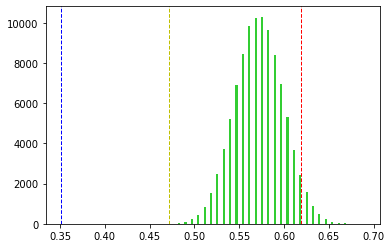

1


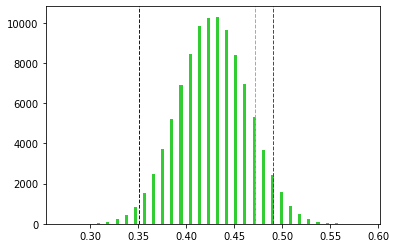

macro avg


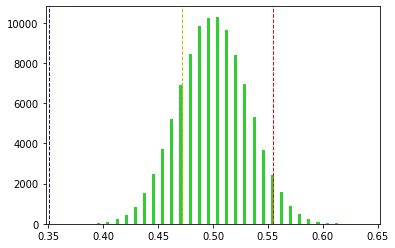

weighted avg


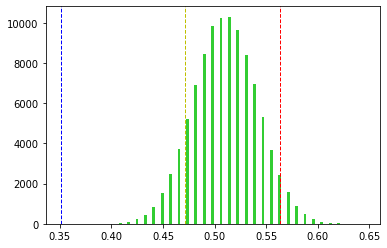

In [58]:
import matplotlib.pyplot as plt

for i in list(a[0].keys()):
    if (i == 'accuracy'):
        continue
    print(i)
    b = list(map(lambda x: x[i]['f1-score'], a))
    c = plt.hist(b, bins=100, color='limegreen')
    plt.axvline(np.percentile(b, 95), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(result_age['weighted avg']['f1-score'], color='b', linestyle='dashed', linewidth=1)
    plt.axvline(result_sex['weighted avg']['f1-score'], color='y', linestyle='dashed', linewidth=1)
    plt.show()